In [62]:
# Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
# zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
# ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
# Используя математические операции, посчитать коэффициенты линейной регрессии, 
# приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 
# Произвести расчет как с использованием intercept, так и без.

In [63]:
import numpy as np
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(x)
b = (np.mean(x*y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b0 = np.mean(y) - b*np.mean(x)
b0, b

(444.1773573243596, 2.620538882402765)

In [64]:
y_pred = b0 + b*x #расчет с использованием intercept
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

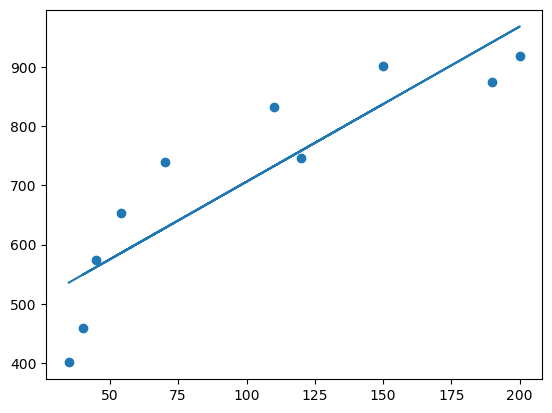

In [65]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, y_pred)

In [66]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
x = x.reshape((10, 1))
y = y.reshape((10, 1))
b = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T @ y)
b

array([[5.88982042]])

In [67]:
y_pred = b*x #расчет с использованием без intercept
y_pred

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

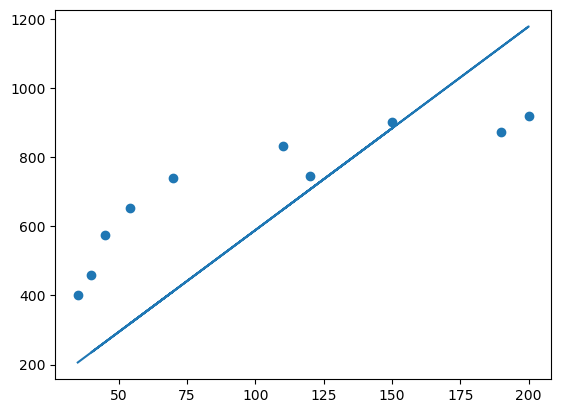

In [68]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, y_pred)

In [2]:
# Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [39]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [40]:
def mse_(b1, y=y, x=x, n=10):
    return np.sum((b1*x-y)**2)/n

In [45]:
b1 = 0.1
alpha = 1e-6
alpha

1e-06

In [46]:
for i in range (10000):
    b1 -= alpha*(2/n)*np.sum((b1*x-y)*x)
    if i%5000 == 0:
        print('Iteration: {i}, b1={b1}, mse={mse}'.format(i=i, b1=b1, mse=mse_(b1)))

Iteration: 0, b1=0.25952808, mse=493237.7212546963
Iteration: 5000, b1=5.889820420132673, mse=56516.85841571943


In [3]:
# Произвести вычисления как в пункте 2, но с вычислением intercept. 
# Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно 
# (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [76]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b0 = 0.1
b1 = 0.1
alpha = 5e-5
alpha
def mse_(b0, b1, y=y, x=x, n=10):
    return np.sum((b0+b1*x-y)**2)/n

In [ ]:
for i in range (750000):
    y_pred = b0 + b1*x
    b0 -= alpha*(2/n)*np.sum(y_pred-y)
    b1 -= alpha*(2/n)*np.sum((y_pred-y)*x)
    if i%30000 == 0:
        print('Iteration: {i},b0={b0}, b1={b1}, mse={mse}'.format(i=i, b0=b0, b1=b1, mse=mse_(b0, b1)))

Iteration: 0,b0=0.169966, b1=8.07539, mse=122360.8044853729
Iteration: 30000,b0=236.72238797814268, b1=4.147499177901624, mse=17387.534091270718
Iteration: 60000,b0=347.251033231717, b1=3.333959481314144, mse=8853.523054754403
Iteration: 90000,b0=398.89180773391786, b1=2.9538605492800123, mse=6990.625380056672
Iteration: 120000,b0=423.0192145710213, b1=2.7762721676196023, mse=6583.971611794087
Iteration: 150000,b0=434.2919301004539, b1=2.6932999973691483, mse=6495.202760188238
